In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx

In [13]:
file = r"C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\data\Duvernay\Duvernay\Duvernay well headers SPE April 21 2021 .xlsx"
df_well = pd.read_excel(file)
print(df_well.head())

               UWI   Elevation Meters ElevationDatum  TD meters   \
0  100072507623W500             555.7             KB      2545.0   
1  100062007823W500             560.9             KB      2430.0   
2  100052107723W500             558.4             KB      2515.5   
3  100061307518W500             631.4             KB      2411.0   
4  100070907618W500             627.0             KB      2408.0   

   SurfaceLatitude_NAD83  SurfaceLongitude_NAD83  BottomLatitude_NAD83  \
0              55.613640             -117.423800             55.613640   
1              55.770872             -117.537674             55.770872   
2              55.683723             -117.516168             55.683723   
3              55.494600             -116.653606             55.494600   
4              55.566965             -116.726243             55.566965   

   BottomLongitude_NAD83  SurfaceLatitude_NAD27  SurfaceLongitude_NAD27  \
0            -117.423800              55.613640             -117.423800

In [14]:
column_names = df_well.columns
print(column_names)
duvernay_geo = df_well[
    ['UWI ', 'Elevation Meters', 'TD meters ', 'SurfaceLongitude_NAD83',
     'SurfaceLatitude_NAD83',
     ]]
print(duvernay_geo.head())

Index(['UWI ', 'Elevation Meters', 'ElevationDatum', 'TD meters ',
       'SurfaceLatitude_NAD83', 'SurfaceLongitude_NAD83',
       'BottomLatitude_NAD83', 'BottomLongitude_NAD83',
       'SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27'],
      dtype='object')
               UWI   Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0  100072507623W500             555.7      2545.0             -117.423800   
1  100062007823W500             560.9      2430.0             -117.537674   
2  100052107723W500             558.4      2515.5             -117.516168   
3  100061307518W500             631.4      2411.0             -116.653606   
4  100070907618W500             627.0      2408.0             -116.726243   

   SurfaceLatitude_NAD83  
0              55.613640  
1              55.770872  
2              55.683723  
3              55.494600  
4              55.566965  


In [15]:
print(df_well.isna().any())

UWI                       False
Elevation Meters          False
ElevationDatum            False
TD meters                 False
SurfaceLatitude_NAD83     False
SurfaceLongitude_NAD83    False
BottomLatitude_NAD83      False
BottomLongitude_NAD83     False
SurfaceLatitude_NAD27     False
SurfaceLongitude_NAD27    False
BottomLatitude_NAD27      False
BottomLongitude_NAD27     False
dtype: bool


In [16]:
gdf = gpd.GeoDataFrame(
    duvernay_geo, crs='epsg:4269', geometry=gpd.points_from_xy
    (duvernay_geo.SurfaceLongitude_NAD83, duvernay_geo.SurfaceLatitude_NAD83))

print(gdf.head())

               UWI   Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0  100072507623W500             555.7      2545.0             -117.423800   
1  100062007823W500             560.9      2430.0             -117.537674   
2  100052107723W500             558.4      2515.5             -117.516168   
3  100061307518W500             631.4      2411.0             -116.653606   
4  100070907618W500             627.0      2408.0             -116.726243   

   SurfaceLatitude_NAD83                     geometry  
0              55.613640  POINT (-117.42380 55.61364)  
1              55.770872  POINT (-117.53767 55.77087)  
2              55.683723  POINT (-117.51617 55.68372)  
3              55.494600  POINT (-116.65361 55.49460)  
4              55.566965  POINT (-116.72624 55.56697)  


In [17]:
gdf = gdf.to_crs(epsg=3857)
print(gdf.head())

               UWI   Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0  100072507623W500             555.7      2545.0             -117.423800   
1  100062007823W500             560.9      2430.0             -117.537674   
2  100052107723W500             558.4      2515.5             -117.516168   
3  100061307518W500             631.4      2411.0             -116.653606   
4  100070907618W500             627.0      2408.0             -116.726243   

   SurfaceLatitude_NAD83                           geometry  
0              55.613640  POINT (-13071557.623 7481883.651)  
1              55.770872  POINT (-13084234.019 7512937.315)  
2              55.683723  POINT (-13081839.982 7495709.772)  
3              55.494600  POINT (-12985820.019 7458455.717)  
4              55.566965  POINT (-12993905.933 7472689.213)  


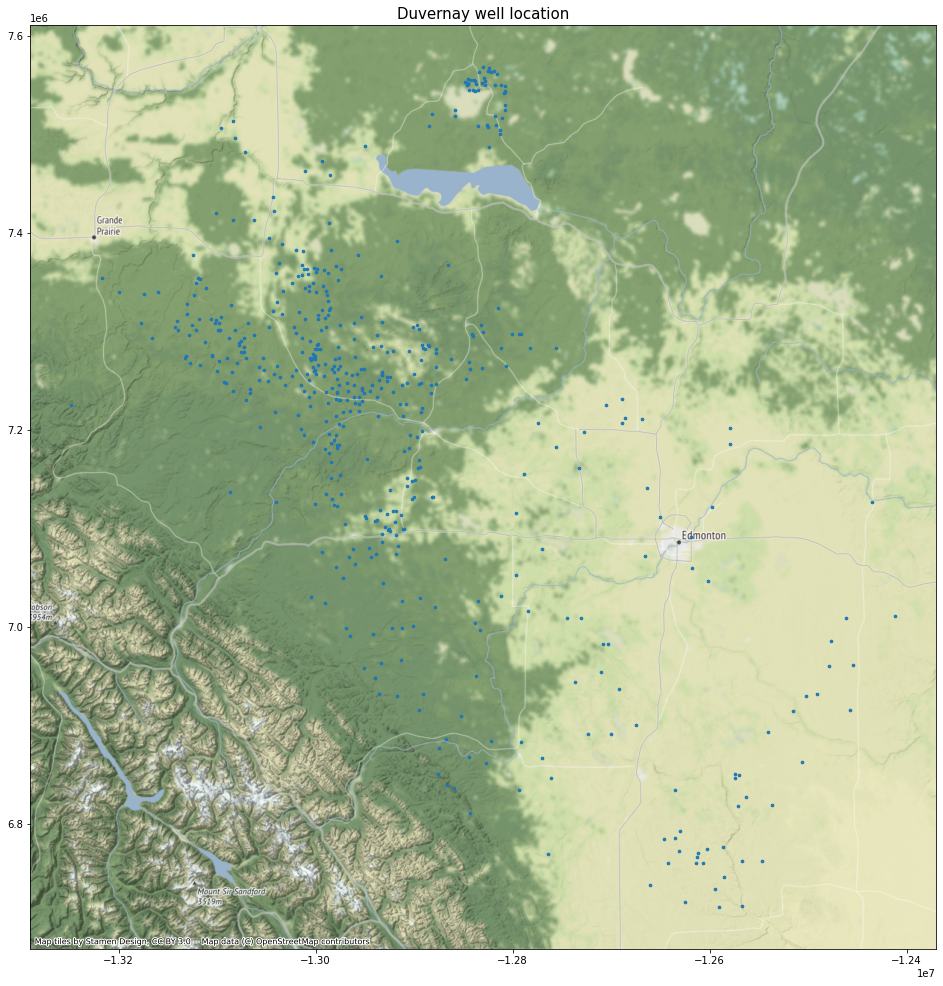

In [18]:
ax = gdf.plot(markersize=7, figsize=(20, 17))
cx.add_basemap(ax)
plt.title("Duvernay well location", fontsize=15)
plt.show()

In [19]:
file = r'C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\data\Duvernay\Duvernay\SPE Duvernay production summary April 20 2021.xlsx'
prod_dvnay = pd.read_excel(file)
print(prod_dvnay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   API                              512 non-null    object        
 1   Measured Depth (ft)              512 non-null    int64         
 2   Total Vertical Depth (ft)        512 non-null    int64         
 3   Spud Date                        512 non-null    datetime64[ns]
 4   Completion Date                  230 non-null    datetime64[ns]
 5   First Production Month           155 non-null    datetime64[ns]
 6   Elevation                        512 non-null    object        
 7   Oil Total Cum (bbl)              155 non-null    float64       
 8   Gas Total Cum (mcf)              155 non-null    float64       
 9   Water Total Cum (bbl)            155 non-null    float64       
 10  GOR Total Average                140 non-null    float64      

In [20]:
print(prod_dvnay.columns)
prod_dvnay_2 = prod_dvnay[['API   ', 'Completion Date   ', 'Oil Total Cum (bbl)   ',
                           'Water Total Cum (bbl)   ', 'Gas Total Cum (mcf)   ',
                           'Spud Date   ', 'Last Production Month   ']]
print(prod_dvnay_2.info())

Index(['API   ', 'Measured Depth (ft)   ', 'Total Vertical Depth (ft)   ',
       'Spud Date   ', 'Completion Date   ', 'First Production Month   ',
       'Elevation   ', 'Oil Total Cum (bbl)   ', 'Gas Total Cum (mcf)   ',
       'Water Total Cum (bbl)   ', 'GOR Total Average   ', 'Plug Date   ',
       'First Production Date   ', 'Elevation Drill Floor (ft)   ',
       'Elevation Ground (ft)   ', 'Elevation Kelly Bushing (ft)   ',
       'Last Production Month   ', 'Gas Maximum (mcf)   ',
       'Gas Maximum Date   ', 'Oil Maximum (bbl)   ', 'Oil Maximum Date   ',
       'Water Maximum (bbl)   ', 'Water Maximum Date   ',
       'Yield Total Average   '],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   API                       512 non-null    object        
 1   Completion Date   

In [21]:
prod_dvnay_2['Liquid_Cum'] = prod_dvnay['Oil Total Cum (bbl)   '] \
                             + prod_dvnay['Water Total Cum (bbl)   ']
print(prod_dvnay_2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   API                       512 non-null    object        
 1   Completion Date           230 non-null    datetime64[ns]
 2   Oil Total Cum (bbl)       155 non-null    float64       
 3   Water Total Cum (bbl)     155 non-null    float64       
 4   Gas Total Cum (mcf)       155 non-null    float64       
 5   Spud Date                 512 non-null    datetime64[ns]
 6   Last Production Month     155 non-null    datetime64[ns]
 7   Liquid_Cum                155 non-null    float64       
dtypes: datetime64[ns](3), float64(4), object(1)
memory usage: 32.1+ KB
None


<ipython-input-21-e7011f26f6a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_dvnay_2['Liquid_Cum'] = prod_dvnay['Oil Total Cum (bbl)   '] \


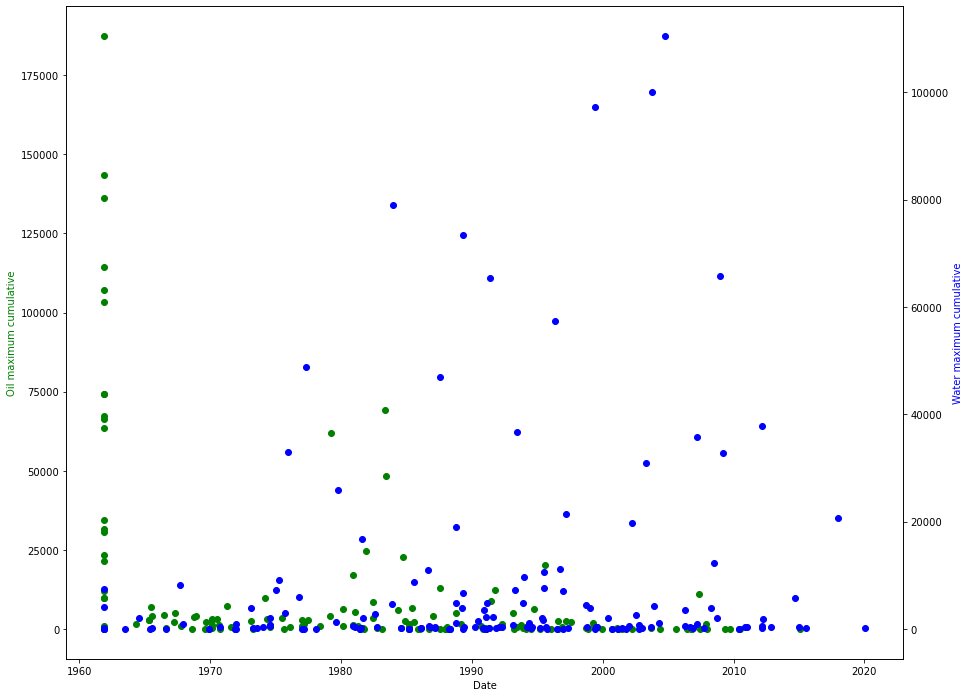

In [22]:
def plot_data(axes, x, y, color, xlabel, ylabel):
    axes.scatter(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)


fig, ax = plt.subplots(figsize=(15, 12))
plot_data(ax, prod_dvnay['Oil Maximum Date   '],
          prod_dvnay['Oil Maximum (bbl)   '], "green", "Date", "Oil maximum cumulative")
ax2 = ax.twinx()
plot_data(ax2, prod_dvnay['Water Maximum Date   '],
          prod_dvnay['Water Maximum (bbl)   '], "blue", "Date",
          "Water maximum cumulative")
plt.show()

In [28]:
gdf_2 = gdf.merge(prod_dvnay_2, how='left', left_on='UWI ', right_on='API   ')
gdf_2.drop('API   ', axis=1, inplace=True)
print(gdf_2.columns)

Index(['UWI ', 'Elevation Meters', 'TD meters ', 'SurfaceLongitude_NAD83',
       'SurfaceLatitude_NAD83', 'geometry', 'Completion Date   ',
       'Oil Total Cum (bbl)   ', 'Water Total Cum (bbl)   ',
       'Gas Total Cum (mcf)   ', 'Spud Date   ', 'Last Production Month   ',
       'Liquid_Cum'],
      dtype='object')


In [35]:
# gpkg_file_name = "dvnay.gpkg"
gpkg_save_path = r"C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\Scripts_gtx\dvnay.gpkg"
gdf_2.to_file(gpkg_save_path, layer="production", driver='GPKG')